<a href="https://colab.research.google.com/github/gopal2812/mlblr/blob/master/ml_gridsearch_multiple_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import read_csv
from pandas import to_numeric
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Airport.csv to Airport.csv


In [0]:
filename="Airport.csv"
dataset = read_csv(filename).set_index('DATE')
print(dataset.shape)
print(dataset.head(20))
print(dataset.info())
print(dataset.describe())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,25,26,27,28,41,42,43,49,51,52,63,71,88,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(110547, 123)
                         STATION REPORT_TYPE  ...  TStorms  WindEquipmentChangeDate
DATE                                          ...                                  
2010-01-01T00:56:00  72494023234       FM-15  ...      NaN                      NaN
2010-01-01T01:56:00  72494023234       FM-15  ...      NaN                      NaN
2010-01-01T02:56:00  72494023234       FM-15  ...      NaN                      NaN
2010-01-01T03:56:00  72494023234       SY-MT  ...      NaN                      NaN
2010-01-01T04:56:00  72494023234       FM-15  ...      NaN                      NaN
2010-01-01T05:56:00  72494023234       FM-15  ...      NaN                      NaN
2010-01-01T06:56:00  72494023234       FM-15  ...      NaN                      NaN
2010-01-01T07:56:00  72494023234       FM-15  ...      NaN                      NaN
2010-01-01T08:56:00  72494023234       FM-15  ...      NaN                      NaN
2010-01-01T09:56:00  72494023234       SY-MT  ...      NaN    

In [0]:
dataset_nan=dataset.dropna(axis=1, how='all')
dataset_nan.shape
#Remove For non-Boolean data
#Total number of NaN entries in a column must be less than 80% of total entries:
dataset_nan = dataset_nan.drop(['SOURCE', 'REPORT_TYPE.1', 'SOURCE.1', 'REPORT_TYPE', 'STATION', 'REM','HourlyPresentWeatherType', 'HourlySkyConditions'], axis=1)
df_without_nan = dataset_nan.loc[:, dataset_nan.isnull().sum() < 0.95*dataset_nan.shape[0]]

In [0]:
#remove the unnecessary column
df_without_nan.shape
#drop all values containing NaN
#df_without_nan=df_without_nan.dropna(how='any')

(110547, 14)

In [0]:
df_without_nan['HourlyPrecipitation'].unique()

array(['0.00', 'T', nan, '0.09', '0.08', '0.07', '0.03', '0.01', '0.02',
       '0.12', '0.05', '0.29', '0.16', '0.17', '0.21', '0.46', '0.31',
       '0.15', '0.10', '0.17s', '0.05s', '0.06', '0.18', '0.38', '0.45',
       '0.11', '0.04', '0.03s', '0.13', '0.28', '0.14', '0.20', '0.04s',
       '0.33', '0.35', '0.22', '0.14s', '0.24', '0.09s', '0.19', '0.25',
       '0.26', '0.32', '0.23', '0.08s', '0.30', '0.37', '0.02s', '0.10s',
       '0.12s', '0.07s', '0.13s', '0.27', '0.06s', '0.40', '0.21s',
       '0.01s', '0.71s', '0.34', '0.36', '0.44', '0.49', '0.39', '0.41',
       '0.47s', '0.47'], dtype=object)

In [0]:
df_without_nan.loc[df_without_nan['HourlyPrecipitation'] == "0.00", 'HourlyPrecipitation'] = 0
df_without_nan.loc[df_without_nan['HourlyPrecipitation'] == 'T', 'HourlyPrecipitation'] = 0
df_without_nan.loc[df_without_nan['HourlyPrecipitation'] != 0, 'HourlyPrecipitation'] = 1
df_without_nan['HourlyPrecipitation'].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([0, 1])

In [0]:
#how to change the column tolist
cols = df_without_nan.columns.tolist()
print(cols)
cols= cols[0:3] + cols[4:14] + cols[3:4]
print(cols)

df_without_nan = df_without_nan[cols]
df_without_nan.shape

['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindGustSpeed', 'HourlyWindSpeed']
['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindGustSpeed', 'HourlyWindSpeed', 'HourlyPrecipitation']


(110547, 14)

In [0]:
df_without_nan['HourlyAltimeterSetting']=df_without_nan['HourlyAltimeterSetting'].apply(lambda S:str(S).strip('s'))
df_without_nan.loc[df_without_nan['HourlyAltimeterSetting'] == "NaN", 'HourlyAltimeterSetting'] = 30
df_without_nan.loc[df_without_nan['HourlyAltimeterSetting'] == "nan", 'HourlyAltimeterSetting'] = 30
df_without_nan['HourlyAltimeterSetting'].unique
df_without_nan['HourlyAltimeterSetting']=df_without_nan['HourlyAltimeterSetting'].apply(to_numeric)

In [0]:
df_without_nan['HourlyDewPointTemperature']=df_without_nan['HourlyDewPointTemperature'].apply(lambda S:str(S).strip('s'))
df_without_nan.loc[df_without_nan['HourlyDewPointTemperature'] == "nan", 'HourlyDewPointTemperature'] = "NaN"
df_without_nan['HourlyDewPointTemperature'].fillna(method='ffill', inplace=True)
df_without_nan.loc[df_without_nan['HourlyDewPointTemperature'] == "NaN", 'HourlyDewPointTemperature'] = df_without_nan['HourlyDewPointTemperature'].mode().iloc[0]
df_without_nan['HourlyDewPointTemperature'].unique()
df_without_nan['HourlyDewPointTemperature']=df_without_nan['HourlyDewPointTemperature'].apply(to_numeric)


In [0]:

df_without_nan['HourlyDryBulbTemperature']=df_without_nan['HourlyDryBulbTemperature'].apply(lambda S:str(S).strip('s'))
df_without_nan.loc[df_without_nan['HourlyDryBulbTemperature'] == "nan", 'HourlyDryBulbTemperature'] = np.nan
df_without_nan['HourlyDryBulbTemperature']=df_without_nan['HourlyDryBulbTemperature'].convert_objects(convert_numeric=True)
#apply(to_numeric, errors='ignore')
df_without_nan['HourlyDewPointTemperature']=df_without_nan['HourlyDewPointTemperature'].apply(to_numeric)
df_without_nan['HourlyDryBulbTemperature'].fillna(method='ffill', inplace=True)
df_without_nan['HourlyDryBulbTemperature'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


array([ 52.,  51.,  53.,  54.,  55.,  57.,  56.,  50.,  49.,  48.,  47.,
        46.,  45.,  43.,  58.,  62.,  61.,  59.,  60.,  44.,  63.,  64.,
        42.,  40.,  67.,  65.,  66.,  70.,  69.,  72.,  71.,  73.,  74.,
        75.,  77.,  68.,  76.,  79.,  78.,  81.,  83.,  85.,  86.,  82.,
        90.,  88.,  87.,  80.,  98.,  94.,  92.,  91.,  84.,  89.,  93.,
        39.,  38.,  41.,  37.,  36.,  35.,  96.,  97., 101.,  95.])

In [0]:
df_without_nan['HourlySeaLevelPressure'].unique()
df_without_nan.loc[df_without_nan['HourlySeaLevelPressure'] == "nan", 'HourlySeaLevelPressure'] = np.nan
df_without_nan['HourlySeaLevelPressure']=df_without_nan['HourlySeaLevelPressure'].apply(lambda S:str(S).strip('s'))
df_without_nan['HourlySeaLevelPressure']=df_without_nan['HourlySeaLevelPressure'].convert_objects(convert_numeric=True)
#df_without_nan['HourlySeaLevelPressure']=df_without_nan['HourlySeaLevelPressure'].apply(to_numeric)
df_without_nan['HourlySeaLevelPressure'].fillna(method='ffill', inplace=True)
df_without_nan['HourlySeaLevelPressure'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


array([30.32, 30.31, 30.33, 30.29, 30.27, 30.28, 30.26, 30.25, 30.23,
       30.22, 30.21, 30.2 , 30.18, 30.17, 30.16, 30.15, 30.12, 30.1 ,
       30.11, 30.13, 30.14, 30.19, 30.07, 30.09, 30.08, 30.06, 30.05,
       30.04, 30.03, 30.01, 30.02, 29.98, 30.  , 29.99, 29.96, 29.95,
       29.91, 29.9 , 29.87, 30.24, 30.3 , 30.34, 30.35, 29.97, 29.94,
       29.93, 29.89, 29.88, 29.92, 29.86, 29.85, 29.8 , 29.81, 29.82,
       29.79, 29.76, 29.75, 29.73, 29.69, 29.67, 29.64, 29.59, 29.54,
       29.52, 29.45, 29.39, 29.38, 29.34, 29.35, 29.36, 29.41, 29.43,
       29.48, 29.49, 29.55, 29.56, 29.5 , 29.46, 29.37, 29.44, 29.4 ,
       29.47, 29.31, 29.27, 29.23, 29.18, 29.11, 29.15, 29.2 , 29.19,
       29.17, 29.21, 29.22, 29.24, 29.26, 29.28, 29.25, 29.09, 29.06,
       29.03, 29.  , 28.95, 28.91, 28.89, 28.88, 28.9 , 28.94, 28.97,
       29.01, 29.04, 29.07, 29.1 , 29.13, 29.14, 29.32, 29.42, 29.53,
       29.57, 29.61, 29.63, 29.66, 29.71, 29.84, 29.83, 29.78, 29.77,
       29.7 , 29.68,

In [0]:
df_without_nan['HourlyWindDirection'].unique()
df_without_nan['HourlyWindDirection']=df_without_nan['HourlyWindDirection'].convert_objects(convert_numeric=True)
#df_without_nan.loc[df_without_nan['HourlyWindDirection'] == "nan", 'HourlyWindDirection'] = np.nan
#df_without_nan.loc[df_without_nan['HourlyWindDirection'] == "VRB", 'HourlyWindDirection'] = np.nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [0]:
df_without_nan['HourlyWindDirection'].unique()
df_without_nan['HourlyWindDirection'].fillna(method='ffill', inplace=True)
df_without_nan['HourlyWindDirection'].unique()


array([160., 290.,   0., 340., 170., 150., 100.,  20.,  90.,  70.,  10.,
       300., 260., 110.,  80., 360., 350.,  30., 120., 130., 140.,  60.,
        40., 180., 210., 330.,  50., 240., 190., 230., 250., 280., 270.,
       200., 320., 220., 310., 155.,  19.])

In [0]:
df_without_nan['HourlyStationPressure'].unique()
df_without_nan['HourlyStationPressure']=df_without_nan['HourlyStationPressure'].apply(lambda S:str(S).strip('s'))
df_without_nan['HourlyStationPressure']=df_without_nan['HourlyStationPressure'].convert_objects(convert_numeric=True)
df_without_nan['HourlyStationPressure'].fillna(method='ffill', inplace=True)
#df_without_nan['HourlyStationPressure']=df_without_nan['HourlyStationPressure'].apply(to_numeric)
#df_without_nan['HourlyVisibility']=df_without_nan['HourlyVisibility'].convert_objects(convert_numeric=True)
#df_without_nan['HourlySeaLevelPressure'].fillna(method='ffill', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:

df_without_nan['HourlyVisibility']=df_without_nan['HourlyVisibility'].apply(lambda S:str(S).strip('V'))
df_without_nan['HourlyVisibility']=df_without_nan['HourlyVisibility'].convert_objects(convert_numeric=True)
df_without_nan['HourlyVisibility'].fillna(method='ffill', inplace=True)
df_without_nan['HourlyVisibility'].unique()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


array([10.  ,  9.  ,  8.  ,  7.  ,  6.  ,  5.  ,  3.  ,  2.  ,  4.  ,
        2.5 ,  1.  ,  0.5 ,  0.25,  9.94,  8.7 ,  1.25,  0.75,  1.75,
        1.5 ,  0.12,  2.98,  6.84,  7.46,  0.  ,  0.99,  4.97,  3.73,
       46.6 ,  5.59,  1.99,  1.49,  1.74,  2.49,  1.24])

In [0]:
df_without_nan['HourlyAltimeterSetting'].unique()

array([30.32, 30.31, 30.33, 30.34, 30.29, 30.27, 30.28, 30.26, 30.3 ,
       30.  , 30.25, 30.23, 30.22, 30.21, 30.2 , 30.19, 30.18, 30.17,
       30.16, 30.15, 30.12, 30.11, 30.1 , 30.13, 30.14, 30.09, 30.07,
       30.08, 30.06, 30.05, 30.04, 30.03, 30.02, 30.01, 29.98, 29.99,
       29.97, 29.96, 29.92, 29.91, 29.87, 30.24, 30.35, 30.36, 29.95,
       29.94, 29.93, 29.89, 29.9 , 29.88, 29.86, 29.85, 29.8 , 29.81,
       29.82, 29.79, 29.76, 29.75, 29.74, 29.69, 29.68, 29.67, 29.64,
       29.59, 29.54, 29.52, 29.45, 29.39, 29.38, 29.37, 29.34, 29.31,
       29.29, 29.32, 29.35, 29.41, 29.43, 29.48, 29.5 , 29.55, 29.56,
       29.51, 29.46, 29.4 , 29.44, 29.42, 29.49, 29.47, 29.27, 29.24,
       29.18, 29.11, 29.14, 29.13, 29.15, 29.2 , 29.19, 29.17, 29.22,
       29.26, 29.28, 29.09, 29.06, 29.03, 29.01, 29.  , 28.95, 28.92,
       28.91, 28.9 , 28.89, 28.88, 28.93, 28.94, 28.97, 29.04, 29.07,
       29.08, 29.1 , 29.53, 29.58, 29.61, 29.66, 29.71, 29.73, 29.84,
       29.83, 29.78,

In [0]:
df_without_nan.shape

(110547, 14)

In [0]:
df_without_nan['HourlyWetBulbTemperature'].fillna(method='ffill', inplace=True)
df_without_nan['HourlyWindGustSpeed'].fillna(method='ffill', inplace=True)
df_without_nan['HourlyWindSpeed'].fillna(method='ffill', inplace=True)
df_without_nan['HourlyPressureChange'].fillna(method='ffill', inplace=True)
df_without_nan['HourlyPressureTendency'].fillna(method='ffill', inplace=True)
df_without_nan['HourlyRelativeHumidity'].fillna(method='ffill', inplace=True)

df_without_nan['HourlyWetBulbTemperature'].fillna(method='bfill', inplace=True)
df_without_nan['HourlyWindGustSpeed'].fillna(method='bfill', inplace=True)
df_without_nan['HourlyWindSpeed'].fillna(method='bfill', inplace=True)
df_without_nan['HourlyPressureChange'].fillna(method='bfill', inplace=True)
df_without_nan['HourlyPressureTendency'].fillna(method='bfill', inplace=True)
df_without_nan['HourlyRelativeHumidity'].fillna(method='bfill', inplace=True)

cols = df_without_nan.columns.tolist()
for i in cols:
  print(i)
  print(df_without_nan[i].unique())
  
array = df_without_nan.values
print(array)

HourlyAltimeterSetting
[30.32 30.31 30.33 30.34 30.29 30.27 30.28 30.26 30.3  30.   30.25 30.23
 30.22 30.21 30.2  30.19 30.18 30.17 30.16 30.15 30.12 30.11 30.1  30.13
 30.14 30.09 30.07 30.08 30.06 30.05 30.04 30.03 30.02 30.01 29.98 29.99
 29.97 29.96 29.92 29.91 29.87 30.24 30.35 30.36 29.95 29.94 29.93 29.89
 29.9  29.88 29.86 29.85 29.8  29.81 29.82 29.79 29.76 29.75 29.74 29.69
 29.68 29.67 29.64 29.59 29.54 29.52 29.45 29.39 29.38 29.37 29.34 29.31
 29.29 29.32 29.35 29.41 29.43 29.48 29.5  29.55 29.56 29.51 29.46 29.4
 29.44 29.42 29.49 29.47 29.27 29.24 29.18 29.11 29.14 29.13 29.15 29.2
 29.19 29.17 29.22 29.26 29.28 29.09 29.06 29.03 29.01 29.   28.95 28.92
 28.91 28.9  28.89 28.88 28.93 28.94 28.97 29.04 29.07 29.08 29.1  29.53
 29.58 29.61 29.66 29.71 29.73 29.84 29.83 29.78 29.77 29.7  29.72 29.65
 29.63 29.6  29.62 30.37 30.39 30.4  30.41 30.42 30.43 30.44 30.45 30.46
 30.48 30.47 30.38 29.57 30.49 30.5  30.51 30.52 30.54 30.55 30.53 30.56
 30.58 29.36 30.57 30.59 29.33

In [0]:
array = df_without_nan.values
print(array)
print(array[:,13])

[[30.32 48.   52.   ... 14.    5.    0.  ]
 [30.31 47.   51.   ... 14.    6.    0.  ]
 [30.32 49.   51.   ... 14.    0.    0.  ]
 ...
 [29.99 58.   67.   ... 24.   10.    0.  ]
 [29.99 58.   68.   ... 24.    8.    0.  ]
 [30.   50.   68.   ... 24.    8.    1.  ]]
[0. 0. 0. ... 0. 0. 1.]


In [0]:

X = array[:,0:13]
Y = array[:,13]

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
scoring = 'neg_log_loss'
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
print("Accuracy:",results.mean()*100.0, results.std()*100.0)
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)


Accuracy: -38.38522291272292 1.9043581887743029


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     26944
         1.0       0.91      0.54      0.68      9537

    accuracy                           0.86     36481
   macro avg       0.88      0.76      0.79     36481
weighted avg       0.87      0.86      0.85     36481



In [0]:
#LDA
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.863234701535499


In [0]:
#K nearest neighbours
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7502776853761033


In [0]:
#Guassian
kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7561937160260183


In [0]:
#CART
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8855052443098913


In [0]:
#SVM
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier,RandomForestClassifier
#Bagging
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())




0.9250538154172145


In [0]:

from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier,RandomForestClassifier
#RandomForest
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9228286475250768


In [0]:
#Extra Tree
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

In [0]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

#adaboost
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8795623965800224


In [0]:
from sklearn.ensemble import VotingClassifier
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
#model3 = SVC()
#estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.8575898269070457


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#standradize
# Standardize the dataset
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
scoring = 'accuracy'
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
#pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

ScaledLR: 0.865161 (0.003081)
ScaledLDA: 0.861110 (0.003517)
ScaledKNN: 0.823711 (0.003544)
ScaledCART: 0.887708 (0.003297)
ScaledNB: 0.755475 (0.003169)


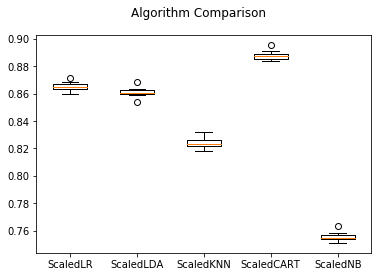

In [0]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()